# Kaggle Digit Recognizer

Code note book for https://www.kaggle.com/competitions/digit-recognizer/overview


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dropout 
import numpy as np
import pandas as pd
import csv

Explore data

In [19]:
digits_train = pd.read_csv(
    "train.csv")
  
digits_train = digits_train.values

x_train = digits_train.copy()
print(x_train.shape)
y_train = x_train[:, -1]
print(x_train.shape)
print(y_train.shape)

x_train = x_train[:, :-1].reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')

x_train = x_train / 255.
print(x_train.shape)

(42000, 785)
(42000, 785)
(42000,)
(42000, 28, 28, 1)


In [20]:

print(x_train.shape)
print(y_train.shape)



(42000, 28, 28, 1)
(42000,)


Explore digits in matplot

1
0
1
4
0


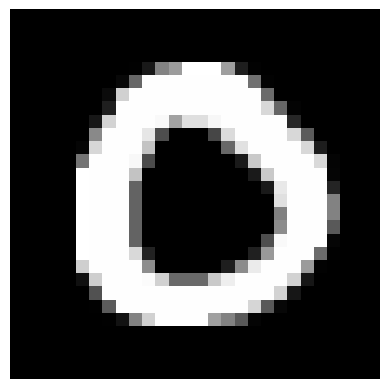

In [ ]:
for i in range(5):
  print(y_train.iloc[i])
  reshape = pd.DataFrame(x_train.iloc[i].values.reshape(28, 28))
  plt.imshow(reshape, cmap='gray')
  plt.axis('off')
plt.show()

Build NN

In [22]:

model = Sequential([
Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(128, activation=tf.nn.relu),
Dropout(0.2),
Dense(10,activation=tf.nn.softmax)])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                      

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [25]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1313/1313 [==============================] - 30s 22ms/step - loss: 6.9728e-08 - accuracy: 1.0000
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 3.6174e-08 - accuracy: 1.0000
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 2.1934e-08 - accuracy: 1.0000
Epoch 4/5
1313/1313 [==============================] - 28s 22ms/step - loss: 1.0788e-08 - accuracy: 1.0000
Epoch 5/5
1313/1313 [==============================] - 29s 22ms/step - loss: 5.7277e-09 - accuracy: 1.0000


Predictions for test data

In [26]:
x_test = pd.read_csv("test.csv")

print(x_test.shape)

x_test = x_test.values

x_test = x_test.reshape(-1, 28, 28, 1)

y_test = model.predict(x_test)

y_pred = y_test.argmax(axis=-1)



(28000, 784)
875/875 [==============================] - 6s 7ms/step


In [28]:
y_pred[:10]
y_test[:10]

array([[0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.       

Store to CSV

In [27]:
with open('predictions.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId','Label'])
    for i in range(y_pred.size):
        writer.writerow([i + 1, y_pred[i]])